# Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

sns.set_theme(style="whitegrid")

In [2]:
df = pd.read_csv('../data/processed/02_df_cleaning.csv')
df.head()

,entity,year,access_to_electricity_of_population,access_to_clean_fuels_for_cooking,renewable_electricity_generating_capacity_per_capita,financial_flows_to_developing_countries_us,renewable_energy_share_in_the_total_final_energy_consumption,electricity_from_fossil_fuels_twh,electricity_from_nuclear_twh,electricity_from_renewables_twh,...,energy_intensity_level_of_primary_energy_mj_2017_ppp_gdp,value_co2_emissions_kt_by_country,gdp_growth,gdp_per_capita,densityn_p_km2,land_area_km2,latitude,longitude,financial_flows_missing,renewable_capacity_missing
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,1.64,760.000000,3.918294,494.179350,60.0,652230.0,33.93911,67.709953,0,0
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,1.74,730.000000,3.918294,494.179350,60.0,652230.0,33.93911,67.709953,0,0
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,1.40,1029.999971,3.918294,179.426579,60.0,652230.0,33.93911,67.709953,0,0
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,1.40,1220.000029,8.832278,190.683814,60.0,652230.0,33.93911,67.709953,0,0
4,Afghanistan,2004,20.064968,10.9,7.75,310000.0,44.24,0.33,0.0,0.56,...,1.20,1029.999971,1.414118,211.382074,60.0,652230.0,33.93911,67.709953,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 22 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   entity                                                        3649 non-null   object 
 1   year                                                          3649 non-null   int64  
 2   access_to_electricity_of_population                           3639 non-null   float64
 3   access_to_clean_fuels_for_cooking                             3480 non-null   float64
 4   renewable_electricity_generating_capacity_per_capita          2718 non-null   float64
 5   financial_flows_to_developing_countries_us                    3649 non-null   float64
 6   renewable_energy_share_in_the_total_final_energy_consumption  3628 non-null   float64
 7   electricity_from_fossil_fuels_twh                             3628 no

# Seed questions

## Economy

### Is there a correlation between GDP per capita and Value CO2 emissions?

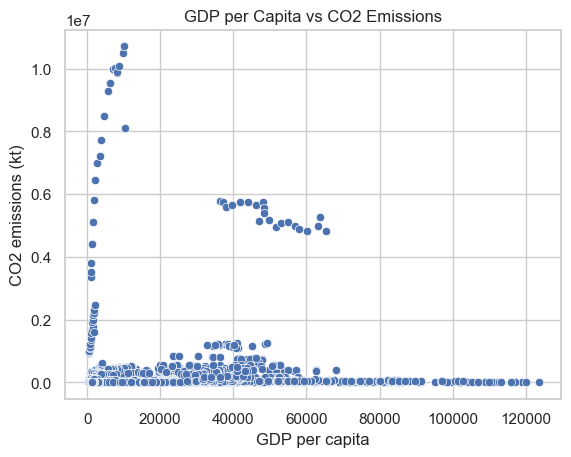

In [4]:
sns.scatterplot(x='gdp_per_capita', y='value_co2_emissions_kt_by_country', data=df)
plt.xlabel('GDP per capita')
plt.ylabel('CO2 emissions (kt)')
plt.title('GDP per Capita vs CO2 Emissions');

The raw scatter between GDP per capita and total CO₂ emissions appears highly skewed due to differences in country population size and the wide range of emission levels. To better reveal underlying relationships, logarithmic scaling and alternative per-capita metrics are used.

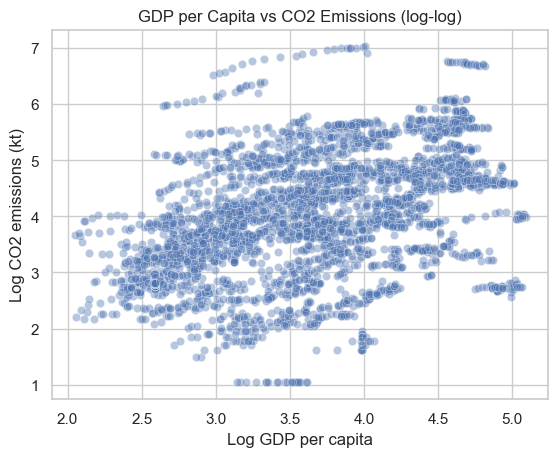

In [5]:
sns.scatterplot(
    x=np.log10(df['gdp_per_capita']),
    y=np.log10(df['value_co2_emissions_kt_by_country'] + 1),
    data=df,
    alpha=0.4
)

plt.xlabel('Log GDP per capita')
plt.ylabel('Log CO2 emissions (kt)')
plt.title('GDP per Capita vs CO2 Emissions (log-log)');

On a logarithmic scale, GDP per capita and total CO₂ emissions show a positive association, indicating that wealthier economies tend to emit more in absolute terms. However, the wide dispersion suggests that economic development alone does not determine emission levels.

### Which countries have managed to increase GDP per capita while decreasing Value CO2 emissions?

In [6]:
start_year = 2000
end_year = 2019 #avoid pandemic effects

In [7]:
df_period = df[df['year'].isin([start_year, end_year])]

pivot = df_period.pivot(
    index='entity',
    columns='year',
    values=['gdp_per_capita', 'value_co2_emissions_kt_by_country']
)
# Drop rows with missing data for either year
pivot = pivot.dropna()

# Percentage changes
pivot['gdp_pc_change_pct'] = (
    (pivot['gdp_per_capita'][end_year] - pivot['gdp_per_capita'][start_year])
    / pivot['gdp_per_capita'][start_year]
) * 100

pivot['co2_change_pct'] = (
    (pivot['value_co2_emissions_kt_by_country'][end_year] - pivot['value_co2_emissions_kt_by_country'][start_year])
    / pivot['value_co2_emissions_kt_by_country'][start_year]
) * 100
pivot

gdp_per_capita                \
year                          2000          2019   
entity                                             
Afghanistan             494.179350    494.179350   
Albania                1126.683340   5395.659532   
Algeria                1765.027146   3989.668276   
Angola                  556.838632   2809.626088   
Antigua and Barbuda   10872.292950  17376.649680   
...                            ...           ...   
Uruguay                6875.025469  17688.015010   
Uzbekistan              558.226802   1784.009816   
Vanuatu                1470.635870   3116.297759   
Zambia                  345.689621   1305.001031   
Zimbabwe                563.057504   1316.740657   

                    value_co2_emissions_kt_by_country                 \
year                                             2000           2019   
entity                                                                 
Afghanistan                                     760.0    6079.999924   
Albania                                        3170.0    4829.999924   
Algeria                                       80050.0  171250.000000   
Angola                                        16200.0   25209.999080   
Antigua and Barbuda                             330.0     519.999981   
...                                               ...            ...   
Uruguay                                        5460.0    6489.999771   
Uzbekistan                                   123810.0  116709.999100   
Vanuatu                                          90.0     209.999993   
Zambia                                         1810.0    6800.000191   
Zimbabwe                                      13700.0   11760.000230   

                    gdp_pc_change_pct co2_change_pct  
year                                                  
entity                                                
Afghanistan                  0.000000     699.999990  
Albania                    378.897605      52.365928  
Algeria                    126.040052     113.928795  
Angola                     404.567379      55.617278  
Antigua and Barbuda         59.825069      57.575752  
...                               ...            ...  
Uruguay                    157.279265      18.864465  
Uzbekistan                 219.585124      -5.734594  
Vanuatu                    111.901384     133.333326  
Zambia                     277.506570     275.690618  
Zimbabwe                   133.855449     -14.160582  

[159 rows x 6 columns]

In [8]:
decoupling_countries = pivot[
    (pivot['gdp_pc_change_pct'] > 0) &
    (pivot['co2_change_pct'] < 0)
].sort_values('gdp_pc_change_pct', ascending=False)

decoupling_countries.head()

gdp_per_capita               value_co2_emissions_kt_by_country  \
year               2000          2019                              2000   
entity                                                                    
Romania     1659.907640  12899.346110                           89020.0   
Bulgaria    1621.242961   9879.268533                           43420.0   
Estonia     4070.609024  23397.120010                           14920.0   
Ukraine      658.348608   3661.456204                          297380.0   
Hungary     4624.281657  16735.659780                           54630.0   

                       gdp_pc_change_pct co2_change_pct  
year              2019                                   
entity                                                   
Romania    73949.99695        677.112280     -16.928783  
Bulgaria   39139.99939        509.363850      -9.857210  
Estonia    10180.00031        474.781805     -31.769435  
Ukraine   174729.99570        456.157659     -41.243528  
Hungary    46380.00107        261.908314     -15.101591

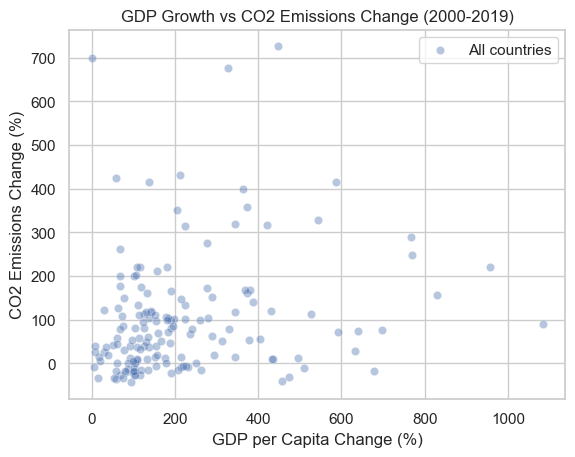

In [9]:
sns.scatterplot(
    x=pivot['gdp_pc_change_pct'],
    y=pivot['co2_change_pct'],
    alpha=0.4,
    label='All countries'
)

plt.xlabel('GDP per Capita Change (%)')
plt.ylabel('CO2 Emissions Change (%)')
plt.title('GDP Growth vs CO2 Emissions Change (2000-2019)');

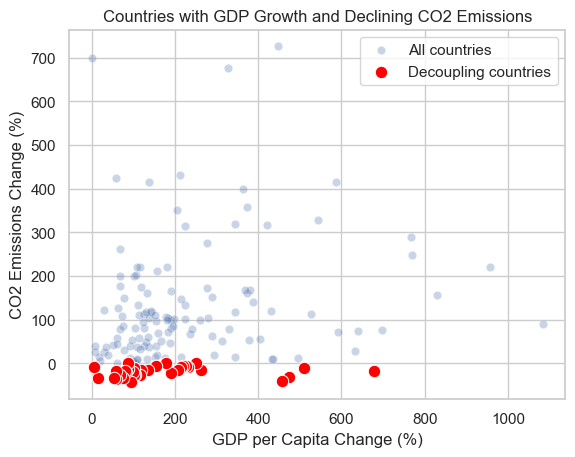

In [10]:
sns.scatterplot(
    x=pivot['gdp_pc_change_pct'],
    y=pivot['co2_change_pct'],
    alpha=0.3,
    label='All countries'
)

sns.scatterplot(
    x=decoupling_countries['gdp_pc_change_pct'],
    y=decoupling_countries['co2_change_pct'],
    color='red',
    s=80,
    label='Decoupling countries'
)

plt.xlabel('GDP per Capita Change (%)')
plt.ylabel('CO2 Emissions Change (%)')
plt.title('Countries with GDP Growth and Declining CO2 Emissions');


The first scatterplot shows the overall relationship between GDP per capita growth and CO₂ emissions change for all countries.
The second plot highlights the subset of countries that achieved GDP growth while reducing emissions, indicating relative decoupling.

A limited group of countries have achieved economic growth alongside declining CO₂ emissions, indicating partial decoupling between income growth and emissions. However, most countries experienced increases in both GDP per capita and emissions over the same period.

### What is the relationship between GDP growth and Renewable electricity? Does investing in green energy slow down economic growth, or is there no negative impact?

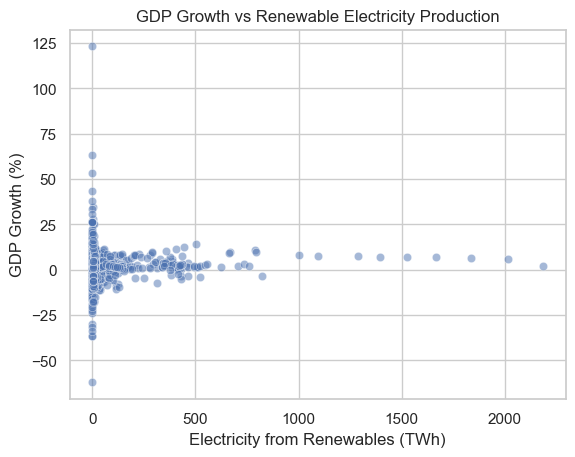

In [11]:
sns.scatterplot(
    x='electricity_from_renewables_twh',
    y='gdp_growth',
    data=df,
    alpha=0.5
)

plt.xlabel('Electricity from Renewables (TWh)')
plt.ylabel('GDP Growth (%)')
plt.title('GDP Growth vs Renewable Electricity Production');

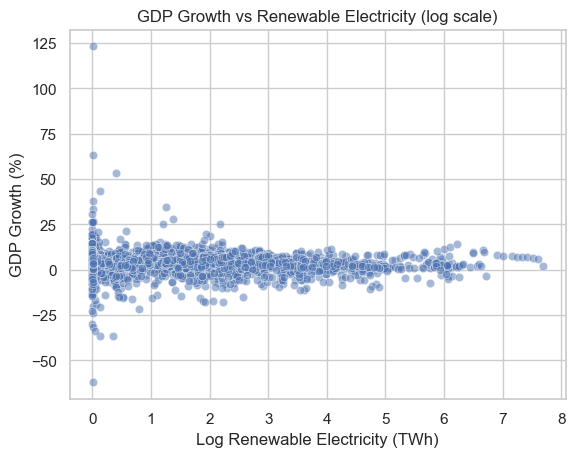

In [12]:
sns.scatterplot(
    x=np.log1p(df['electricity_from_renewables_twh']),
    y='gdp_growth',
    data=df,
    alpha=0.5
)

plt.xlabel('Log Renewable Electricity (TWh)')
plt.ylabel('GDP Growth (%)')
plt.title('GDP Growth vs Renewable Electricity (log scale)');

In [13]:
df[['gdp_growth', 'electricity_from_renewables_twh']].corr()

,gdp_growth,electricity_from_renewables_twh
gdp_growth,1.000000,-0.003507
electricity_from_renewables_twh,-0.003507,1.000000


The correlation between GDP growth and electricity from renewables is zero, indicating no linear relationship.

At an exploratory level, this suggests that higher renewable electricity production is not associated with lower economic growth. Investments in renewable energy do not appear to hinder GDP growth, though no causal relationship can be inferred.

### Does international financial aid actually work? Do countries that receive higher Financial flows show a faster increase in Access to electricity or Renewable capacity in the following years?

In [14]:
df['financial_flows_lag1'] = (
    df.groupby('entity')['financial_flows_to_developing_countries_us']
      .shift(1)
)
df.head()

,entity,year,access_to_electricity_of_population,access_to_clean_fuels_for_cooking,renewable_electricity_generating_capacity_per_capita,financial_flows_to_developing_countries_us,renewable_energy_share_in_the_total_final_energy_consumption,electricity_from_fossil_fuels_twh,electricity_from_nuclear_twh,electricity_from_renewables_twh,...,value_co2_emissions_kt_by_country,gdp_growth,gdp_per_capita,densityn_p_km2,land_area_km2,latitude,longitude,financial_flows_missing,renewable_capacity_missing,financial_flows_lag1
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,760.000000,3.918294,494.179350,60.0,652230.0,33.93911,67.709953,0,0,NaN
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,730.000000,3.918294,494.179350,60.0,652230.0,33.93911,67.709953,0,0,20000.0
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,1029.999971,3.918294,179.426579,60.0,652230.0,33.93911,67.709953,0,0,130000.0
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,1220.000029,8.832278,190.683814,60.0,652230.0,33.93911,67.709953,0,0,3950000.0
4,Afghanistan,2004,20.064968,10.9,7.75,310000.0,44.24,0.33,0.0,0.56,...,1029.999971,1.414118,211.382074,60.0,652230.0,33.93911,67.709953,0,0,25970000.0


In [15]:
df['access_electricity_change'] = (
    df.groupby('entity')['access_to_electricity_of_population']
      .diff()
)
df['renewable_capacity_change'] = (
    df.groupby('entity')['renewable_electricity_generating_capacity_per_capita']
      .diff()
)
df.head()

,entity,year,access_to_electricity_of_population,access_to_clean_fuels_for_cooking,renewable_electricity_generating_capacity_per_capita,financial_flows_to_developing_countries_us,renewable_energy_share_in_the_total_final_energy_consumption,electricity_from_fossil_fuels_twh,electricity_from_nuclear_twh,electricity_from_renewables_twh,...,gdp_per_capita,densityn_p_km2,land_area_km2,latitude,longitude,financial_flows_missing,renewable_capacity_missing,financial_flows_lag1,access_electricity_change,renewable_capacity_change
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,494.179350,60.0,652230.0,33.93911,67.709953,0,0,NaN,NaN,NaN
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,494.179350,60.0,652230.0,33.93911,67.709953,0,0,20000.0,2.460983,-0.36
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,179.426579,60.0,652230.0,33.93911,67.709953,0,0,130000.0,5.334584,-0.39
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,190.683814,60.0,652230.0,33.93911,67.709953,0,0,3950000.0,5.329348,-0.38
4,Afghanistan,2004,20.064968,10.9,7.75,310000.0,44.24,0.33,0.0,0.56,...,211.382074,60.0,652230.0,33.93911,67.709953,0,0,25970000.0,5.326462,-0.34


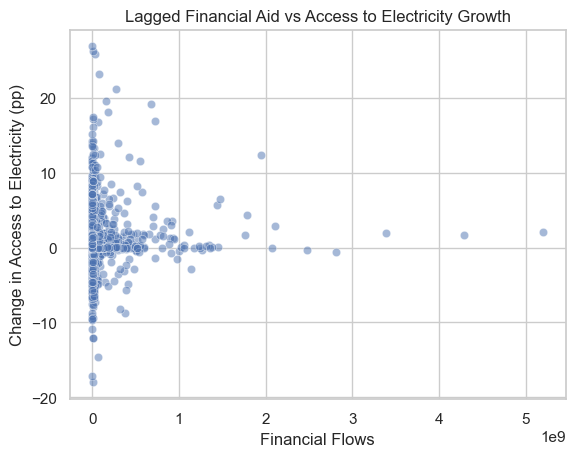

In [16]:
sns.scatterplot(
    x='financial_flows_lag1',
    y='access_electricity_change',
    data=df,
    alpha=0.5
)

plt.xlabel('Financial Flows')
plt.ylabel('Change in Access to Electricity (pp)')
plt.title('Lagged Financial Aid vs Access to Electricity Growth');

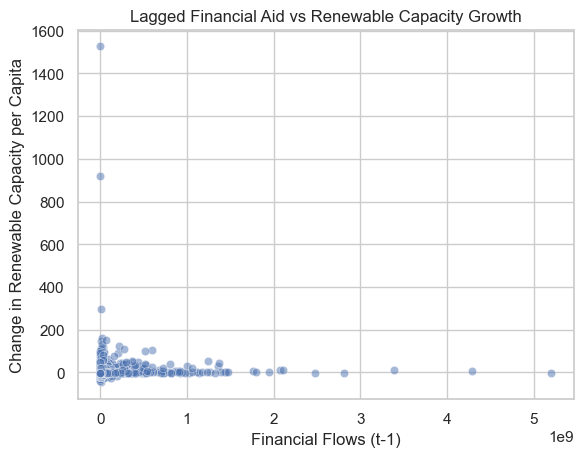

In [17]:
sns.scatterplot(
    x='financial_flows_lag1',
    y='renewable_capacity_change',
    data=df,
    alpha=0.5
)

plt.xlabel('Financial Flows (t-1)')
plt.ylabel('Change in Renewable Capacity per Capita')
plt.title('Lagged Financial Aid vs Renewable Capacity Growth');

In [18]:
df[['financial_flows_lag1',
    'access_electricity_change',
    'renewable_capacity_change']].corr()

,financial_flows_lag1,access_electricity_change,renewable_capacity_change
financial_flows_lag1,1.000000,0.062480,0.026464
access_electricity_change,0.062480,1.000000,0.043072
renewable_capacity_change,0.026464,0.043072,1.000000


In [19]:
country_aid_effect = df.groupby('entity').agg({
    'financial_flows_lag1': 'mean',
    'access_electricity_change': 'mean',
    'renewable_capacity_change': 'mean'
}).dropna()

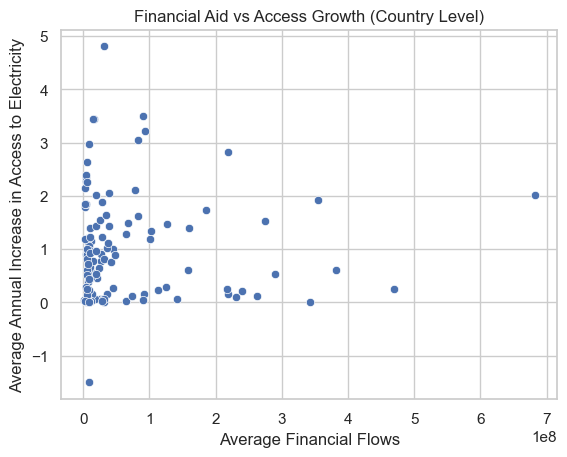

In [20]:
sns.scatterplot(
    x='financial_flows_lag1',
    y='access_electricity_change',
    data=country_aid_effect
)

plt.xlabel('Average Financial Flows')
plt.ylabel('Average Annual Increase in Access to Electricity')
plt.title('Financial Aid vs Access Growth (Country Level)');

In [21]:
country_aid_effect[country_aid_effect['access_electricity_change']<0]

,financial_flows_lag1,access_electricity_change,renewable_capacity_change
entity,,,
Libya,8322500.0,-1.504632,0.037


Lagged financial flows show no strong global correlation with subsequent improvements in access to electricity or renewable energy capacity.
This suggests that international financial aid effectiveness varies substantially across countries and likely depends on institutional capacity, governance, and complementary investments rather than funding levels alone.

## Energy Equity & Social Impact

### What is the correlation between Access to electricity and GDP per capita? At what GDP threshold does a country typically achieve high access?

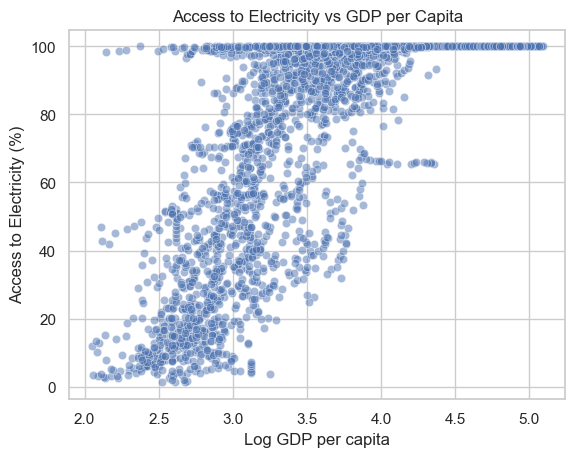

In [22]:
sns.scatterplot(
    x=np.log10(df['gdp_per_capita']),
    y=df['access_to_electricity_of_population'],
    alpha=0.5
)

plt.xlabel('Log GDP per capita')
plt.ylabel('Access to Electricity (%)')
plt.title('Access to Electricity vs GDP per Capita');

In [23]:
df[df['access_to_electricity_of_population'] > 95]['gdp_per_capita'].describe()

count      1920.000000
mean      21906.200477
std       22848.650398
min         138.429147
25%        5106.913580
50%       12520.158915
75%       32851.694615
max      123514.196700
Name: gdp_per_capita, dtype: float64

Countries with near-universal electricity access (>95%) have a median GDP per capita of approximately 12,500 USD.


While high electricity access can be achieved at lower income levels, it is far more prevalent among higher-income countries, suggesting that economic development strongly facilitates widespread electrification.

### How strongly is Access to clean fuels for cooking correlated with Access to electricity? Do these infrastructures develop simultaneously?

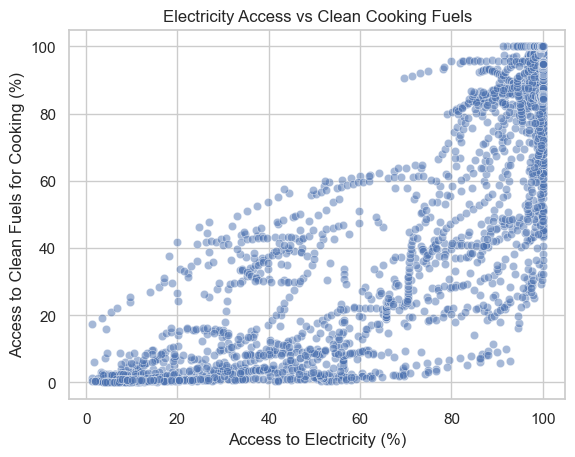

In [24]:
sns.scatterplot(
    x='access_to_electricity_of_population',
    y='access_to_clean_fuels_for_cooking',
    data=df,
    alpha=0.5
)

plt.xlabel('Access to Electricity (%)')
plt.ylabel('Access to Clean Fuels for Cooking (%)')
plt.title('Electricity Access vs Clean Cooking Fuels');

In [25]:
df['access_to_clean_fuels_for_cooking'].corr(df['access_to_electricity_of_population'])

np.float64(0.8665542080430734)

In [26]:
df['clean_cooking_gap'] = (
    df['access_to_electricity_of_population']
    - df['access_to_clean_fuels_for_cooking']
)
df.head()

,entity,year,access_to_electricity_of_population,access_to_clean_fuels_for_cooking,renewable_electricity_generating_capacity_per_capita,financial_flows_to_developing_countries_us,renewable_energy_share_in_the_total_final_energy_consumption,electricity_from_fossil_fuels_twh,electricity_from_nuclear_twh,electricity_from_renewables_twh,...,densityn_p_km2,land_area_km2,latitude,longitude,financial_flows_missing,renewable_capacity_missing,financial_flows_lag1,access_electricity_change,renewable_capacity_change,clean_cooking_gap
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,60.0,652230.0,33.93911,67.709953,0,0,NaN,NaN,NaN,-4.586409
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,60.0,652230.0,33.93911,67.709953,0,0,20000.0,2.460983,-0.36,-3.125426
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,60.0,652230.0,33.93911,67.709953,0,0,130000.0,5.334584,-0.39,1.209158
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,60.0,652230.0,33.93911,67.709953,0,0,3950000.0,5.329348,-0.38,5.238506
4,Afghanistan,2004,20.064968,10.9,7.75,310000.0,44.24,0.33,0.0,0.56,...,60.0,652230.0,33.93911,67.709953,0,0,25970000.0,5.326462,-0.34,9.164968


In [27]:
df['clean_cooking_gap'].describe()

count    3471.000000
mean       14.612379
std        19.690109
min       -21.700000
25%         0.000000
50%         5.300000
75%        26.343845
max        86.299614
Name: clean_cooking_gap, dtype: float64

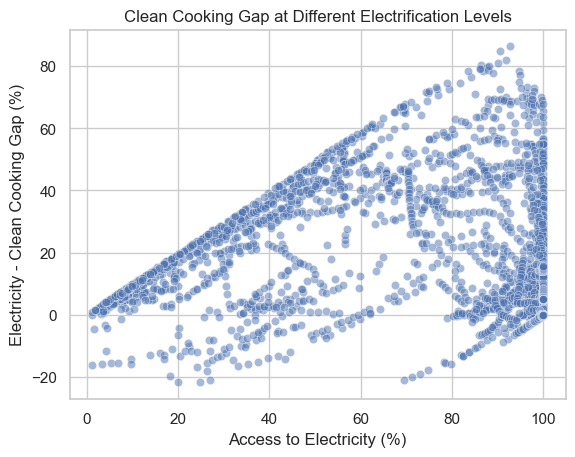

In [28]:
sns.scatterplot(
    x='access_to_electricity_of_population',
    y='clean_cooking_gap',
    data=df,
    alpha=0.5
)

plt.xlabel('Access to Electricity (%)')
plt.ylabel('Electricity - Clean Cooking Gap (%)')
plt.title('Clean Cooking Gap at Different Electrification Levels');

While access to electricity and clean cooking fuels are strongly correlated, clean cooking access consistently lags behind electrification. 

On average, electricity access exceeds clean cooking access by about 15 percentage points, and in one quarter of observations the gap exceeds 26 points. This highlights a persistent energy equity challenge, where households gain electricity but continue relying on polluting cooking fuels.

## Geographic & Structural Trends

### Is there a significant relationship between Density and Energy intensity level? Are denser countries more energy-efficient per capita?

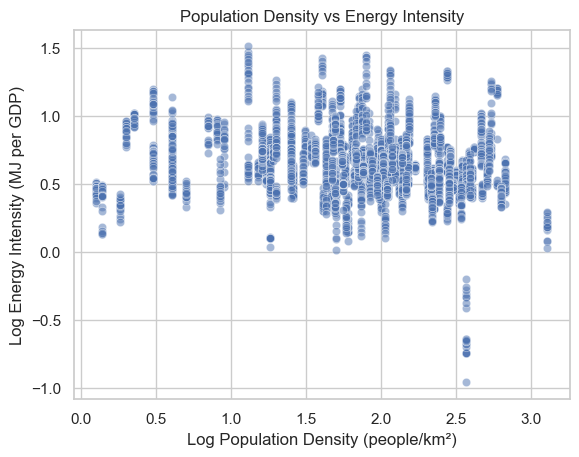

In [29]:
sns.scatterplot(
    x=np.log10(df['densityn_p_km2']),
    y=np.log10(df['energy_intensity_level_of_primary_energy_mj_2017_ppp_gdp']),
    alpha=0.5
)

plt.xlabel('Log Population Density (people/km²)')
plt.ylabel('Log Energy Intensity (MJ per GDP)')
plt.title('Population Density vs Energy Intensity');

In [30]:
df_log = df[['densityn_p_km2',
             'energy_intensity_level_of_primary_energy_mj_2017_ppp_gdp']].dropna()

np.corrcoef(
    np.log10(df_log['densityn_p_km2']),
    np.log10(df_log['energy_intensity_level_of_primary_energy_mj_2017_ppp_gdp'])
)[0, 1]

np.float64(-0.14658426388485424)

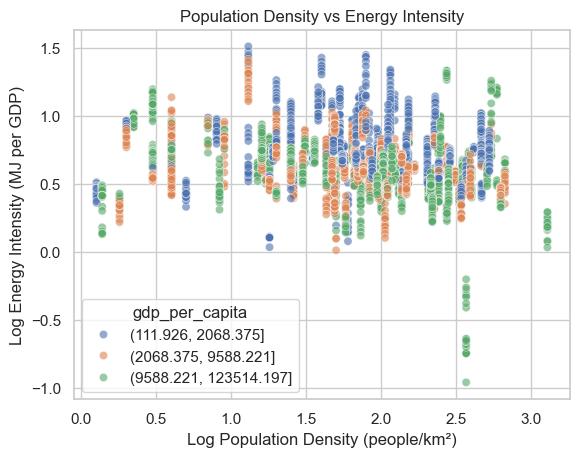

In [31]:
sns.scatterplot(
    x=np.log10(df['densityn_p_km2']),
    y=np.log10(df['energy_intensity_level_of_primary_energy_mj_2017_ppp_gdp']),
    hue=pd.qcut(df['gdp_per_capita'], 3),
    alpha=0.6
)

plt.xlabel('Log Population Density (people/km²)')
plt.ylabel('Log Energy Intensity (MJ per GDP)')
plt.title('Population Density vs Energy Intensity');

Population density shows a weak negative relationship with energy intensity, indicating that denser countries tend to use slightly less energy per unit of GDP.

However, this relationship is modest and highly heterogeneous. High-income countries are more energy-efficient across all density levels, suggesting that income level and economic structure play a larger role in determining energy efficiency than population density alone.

### How has the total Electricity from fossil fuels vs. Electricity from renewables changed globally from 2000 to 2020?

In [32]:
global_energy = df.groupby('year')[[
    'electricity_from_fossil_fuels_twh',
    'electricity_from_renewables_twh',
]].sum()

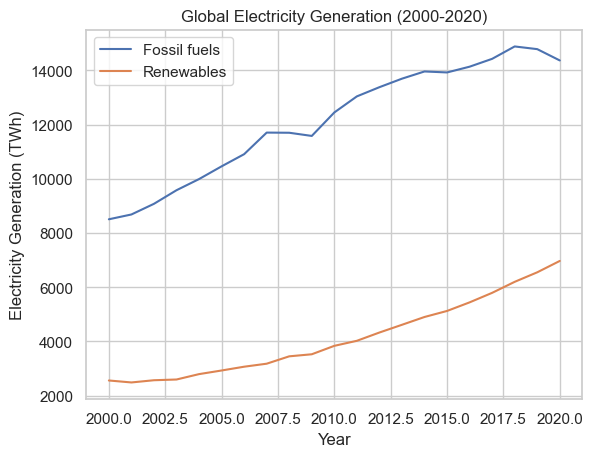

In [33]:
plt.plot(global_energy.index,
         global_energy['electricity_from_fossil_fuels_twh'],
         label='Fossil fuels')

plt.plot(global_energy.index,
         global_energy['electricity_from_renewables_twh'],
         label='Renewables')

plt.xlabel('Year')
plt.ylabel('Electricity Generation (TWh)')
plt.title('Global Electricity Generation (2000-2020)')
plt.legend();

Between 2000 and 2020, global electricity generation from fossil fuels increased substantially, remaining the dominant source of electricity worldwide. At the same time, electricity generation from renewable sources grew steadily, with an acceleration after 2010.

Although renewable electricity has expanded rapidly over the last decade, it has not yet offset fossil fuel–based generation at the global level. Instead, renewable energy has primarily met growing electricity demand rather than replacing existing fossil fuel capacity.

The global energy transition is underway but incomplete. Renewables are gaining importance, yet fossil fuels continue to play a central role in electricity generation.

### Which country has shown the fastest growth rate in Renewable energy share over the last decade?

In [34]:
df_decade = df[df['year'].isin([2010, 2020])]

pivot = df_decade.pivot_table(
    index='entity',
    columns='year',
    values='renewable_energy_share_in_the_total_final_energy_consumption'
)

pivot = pivot.dropna()

pivot['growth_2010_2020'] = pivot[2020] - pivot[2010]

pivot.head()

year,2010,2020,growth_2010_2020
entity,,,
Afghanistan,15.15,19.565,4.415
Algeria,0.26,0.280,0.020
Angola,52.51,55.565,3.055
Antigua and Barbuda,0.00,0.000,0.000
Argentina,8.79,9.390,0.600


In [35]:
top_countries = pivot.sort_values('growth_2010_2020', ascending=False)

top_countries.head(10)

year,2010,2020,growth_2010_2020
entity,,,
Togo,65.81,76.810,11.000
Congo,54.80,63.630,8.830
Fiji,26.49,34.445,7.955
Cuba,15.61,21.750,6.140
Benin,47.19,52.400,5.210
Afghanistan,15.15,19.565,4.415
Ecuador,11.79,15.600,3.810
Solomon Islands,45.07,48.640,3.570
Chile,27.04,30.385,3.345


Between 2010 and 2020, Togo experienced the fastest increase in renewable energy share, with a gain of 11 percentage points.
Overall, the countries with the strongest growth are predominantly developing or small economies, where improvements in hydropower, biomass, and electricity access can significantly shift the energy mix.

#### Are countries growing fast because they started low, or because they actively transformed their energy mix?

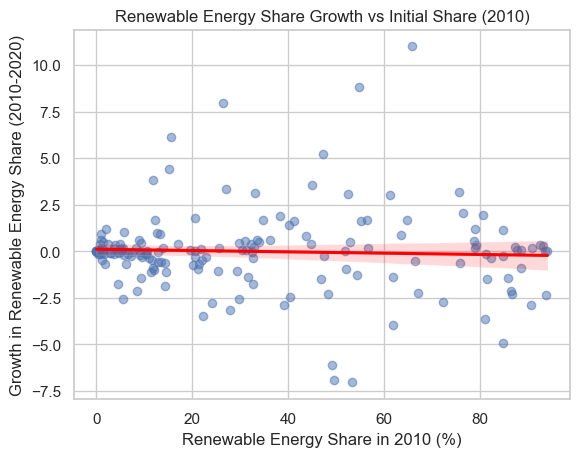

In [36]:
sns.regplot(
    x=pivot[2010],
    y=pivot['growth_2010_2020'],
    scatter_kws={'alpha': 0.5},
    line_kws={'color': 'red'}
)

plt.xlabel('Renewable Energy Share in 2010 (%)')
plt.ylabel('Growth in Renewable Energy Share (2010-2020)')
plt.title('Renewable Energy Share Growth vs Initial Share (2010)');

The scatterplot shows no strong relationship between initial renewable energy share in 2010 and subsequent growth. Countries with already high renewable shares often experienced the largest gains, suggesting that growth reflects consolidation of existing renewable systems rather than catch-up dynamics.